# Music Popularity Prediction

Krishna Prakash Sankaramanchi
<br>
ALY6140 Final Capstone Project
<br>
NUID: 001088911

Instructor: Dr. Morteza Ziyadi

## Introduction
<br>
We all know how music is addictive and how it has become a part of our busy lives. Stats say, on average, Americans spend 32.5 hours per week listening to music. That's roughly 4 hours 50 minutes a day. Everyone wants better song/music to listen everyday. There is a gap where sometimes people don't often get the songs they need or want it. 

I am now going to predict the popularity of a song/music using different Machine Learning techniques and shall finalize which model is better in classifying the song popularity.

<br>

I also want to predict the genre of the track using all the features of the track. This helps in classifying tracks into genres

<br>

There is a song database by Spotify (one of the leading music streaming service). It has many features and two labels namely popularity and genre. I shall dig deep into the database, its implications, complications and will build ML models 

#### Reading Data

The link to the data
<br>
https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db/download/IedE6Omn2lIW9eIcv3ov%2Fversions%2FSOtXf3vemxBio0JOInDu%2Ffiles%2FSpotifyFeatures.csv?datasetVersionNumber=1
<br>
<br>
The data will be downloaded as a **Zipped Folder**
<br>
Kindly unzip it and save the csv file in the required location

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('SpotifyFeatures.csv')
data.shape

(232725, 18)

The dataset consists of 232,725 rows and 18 columns. That is, it has a record of 232,725 songs (Each row is a music track)

In [8]:
for col in data.columns: 
    print(col)

genre
artist_name
track_name
track_id
popularity
acousticness
danceability
duration_ms
energy
instrumentalness
key
liveness
loudness
mode
speechiness
tempo
time_signature
valence


The above mentioned are the dataset's 18 columns. They can be described as

* **genre**: The genre of the music (Movie, Comedy track, Soundtrack etc.)
* **artist_name**: The name of the artist/s under whose the song was published
* **track_name**: The name of the track under which the song was published
* **track_id**: A Unique ID given to that track
* **popularity**: This is a label which tells the popularity of the song on a scale of 0-100 (0 being the least popular music and 100 being the most popular music
* **acousticness**: The acousticity of the track (technical in terms of music). This ranges from 0-1
* **danceability**: The ability to dance for this particular track. This also ranges from 0-1
* **duration_ms**: The duration the track in milli seconds
* **energy**: The energy of a song - the higher the value, the more energtic the song. This ranges from 0-1
* **instrumentalness**: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is, ranges from 0-1
* **key**: It is a group of pitches. A categorical variable with multiple categores
* **liveness**: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”. Ranges from 0-1
* **loudness**: The loudness of the music track. It is a continous variable
* **mode**: The mode of the track. It might be a 'major' mode or 'minor' mode
* **speechiness**: Speechiness detects the presence of spoken words in a track. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech
* **tempo**: the speed at which a passage of music is played. This is a continuous variable and ranging from 30 -243
* **time_signature**: The time at which the data is released
* **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

Now let's look at how data looks like

In [10]:
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


## Exploratory Data Analysis

Let's look at if any missing values are present

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
genre               232725 non-null object
artist_name         232725 non-null object
track_name          232725 non-null object
track_id            232725 non-null object
popularity          232725 non-null int64
acousticness        232725 non-null float64
danceability        232725 non-null float64
duration_ms         232725 non-null int64
energy              232725 non-null float64
instrumentalness    232725 non-null float64
key                 232725 non-null object
liveness            232725 non-null float64
loudness            232725 non-null float64
mode                232725 non-null object
speechiness         232725 non-null float64
tempo               232725 non-null float64
time_signature      232725 non-null object
valence             232725 non-null float64
dtypes: float64(9), int64(2), object(7)
memory usage: 32.0+ MB


We see that there are no NaN values in our dataset. There are 232,725 entries for all the columns. Trying with describe() function

In [12]:
data.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


Seems like there are no missing values in the dataset. Because, there no NaN values as well as all the minimum values and maximum values are according to the standards. 
But there are some fields that needs to be clean
Let's look at the columns one by one and analyse them to see if anything needs to be imputed or cleaned

**Genre**

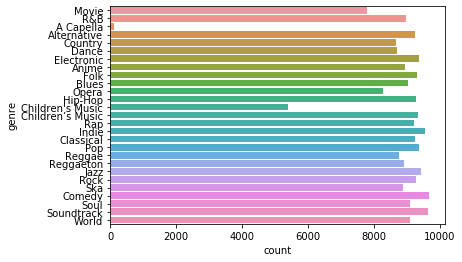

In [43]:
import seaborn as sns

sns.countplot(y = 'genre', data = data, orient = "v")

We see that there are 27 different generes of music in the data. Almost all of them are close to each other in terms of number of tracks they have
<br>
Except for a very few genres, almost all the genres are in the range 8000-10000
<br>
This makes the data a very diverse data collection of music

**Artist name, Track name & Track ID**

* Artist Name: There are multiple artists in the dataset 
* Track Name and Track ID: These are unique values of the dataset which can serve as a primary key.

**Popularity**

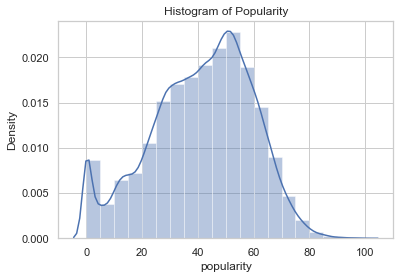

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['popularity'], bins = 20)
plt.title('Histogram of Popularity')
plt.ylabel('Density')
plt.show()

* The popularity is spread between 0-100
* But we can see that the first bar is a little high and is odd

In [58]:
(data['popularity'] == 0).sum()

6312

* There are 6312 '0' popularity tracks in the data
* This is kind of missing data where these tracks' popularity isn't tracked or missed
* A missing data imputation is required for this column where the values are 0
* I shall impute the missing data and store it in a different dataframe
* I shall compare the models with and without imputing the missing values

Text(0.5, 1.0, 'Boxplot of Popularity')

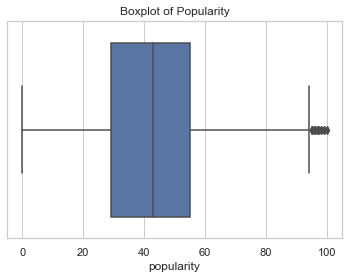

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['popularity'])
plt.title('Boxplot of Popularity')

The mean of the popularity lies between 40-45. There are outliers in the popularity which ranges > 90

Let's look at the popularity for the top 10 genres

In [79]:
genres = data.groupby(['genre'], as_index=False).count()
genres = genres.sort_values(by = ['track_id'], ascending = False)
genres = genres.iloc[0:10,0]
genres = genres.values.tolist()

Created a list named genres which has top 10 genres by count

In [80]:
data_pop = data[data['genre'].isin(genres)]

Subsetted the dataset for those genres
<br>
Now, will plot boxplots for the top 10 genres

Text(0.5, 1.0, 'Boxplots of Popularity for top 10 genres by # of tracks')

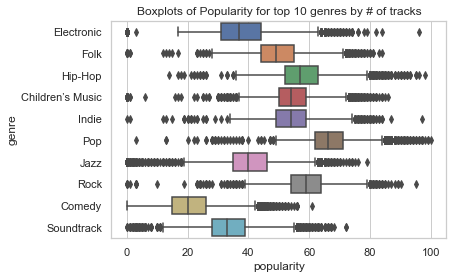

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data_pop['popularity'], y=data_pop['genre'])
plt.title('Boxplots of Popularity for top 10 genres by # of tracks')

* We can see that the most popular genres are Pop, Rock and Hiphop respectively. The popularity ondex of these genres are highwhen compared to other genres
* Next we can see Children's Music, Indie and Folk come to the next set of popular genres.
* Electronic, Jazz, Soundtrack and comedy are the less popular generes
* Surprisingly, Comedy genre has the highest number of tracks in the data

In [92]:
data_pop1 = data[~data['genre'].isin(genres)]

Subsetted the dataset for those genres
<br>
Now, will plot boxplots for the other genres

Text(0.5, 1.0, 'Boxplots of Popularity for other genres by # of tracks')

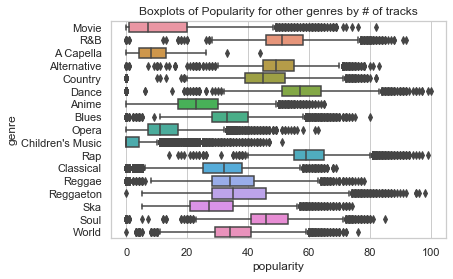

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data_pop1['popularity'], y=data_pop1['genre'])
plt.title('Boxplots of Popularity for other genres by # of tracks')

* We see that the popularities of other genres (Not top 10 by count) are less popular when compared to the top 10 genres by number

**Acousticness**

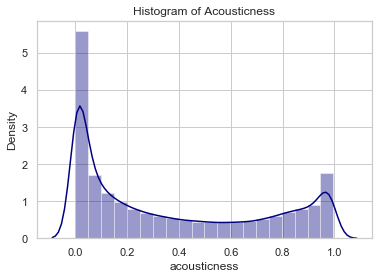

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['acousticness'], bins = 20, color = 'navy')
plt.title('Histogram of Acousticness')
plt.ylabel('Density')
plt.show()

* Acousticness is a value from 0-1
* Let's look at boxplot of acousticness

Text(0.5, 1.0, 'Boxplot of Acousticness')

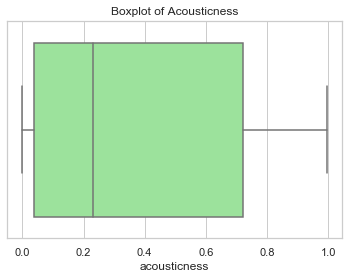

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['acousticness'], color = 'lightgreen')
plt.title('Boxplot of Acousticness')

* The mean of Acousticness lies between 0.2-0.3
* The first and third quadrant are respectively 0.05 and 0.7
* There are no outliers in the acousticness

Now let's look at how acousticness varies with top 10 genres

Text(0.5, 1.0, 'Boxplots of Acousticness for top 10 genres by # of tracks')

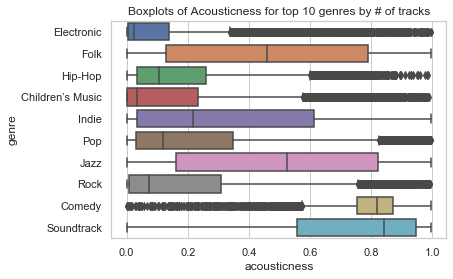

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data_pop['acousticness'], y=data_pop['genre'])
plt.title('Boxplots of Acousticness for top 10 genres by # of tracks')

* It is interesting to note that Soundtracks, Comedy, Jazz and Folk have high acousticness because they are mostly from acoustic instruments like guitar etc. 

**Danceability**

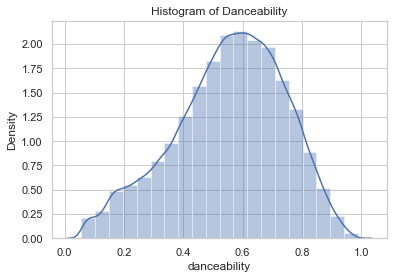

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['danceability'], bins = 20)
plt.title('Histogram of Danceability')
plt.ylabel('Density')
plt.show()

* The distribution almost looks a normal distribution which is a good sign

Let's look at the boxplot of danceability

Text(0.5, 1.0, 'Boxplot of Danceability')

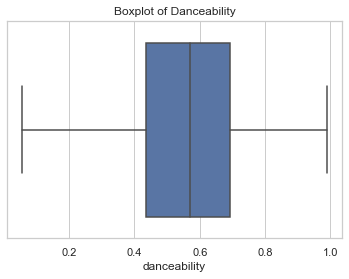

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['danceability'])
plt.title('Boxplot of Danceability')

* The mean of Danceability lies between 0.55-0.6
* There are no outliers in danceability

Now let's look at how danceability varies with genre

Text(0.5, 1.0, 'Boxplots of Danceability for top 10 genres by # of tracks')

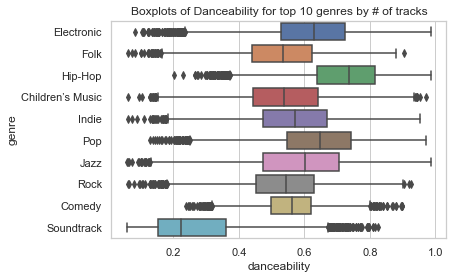

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data_pop['danceability'], y=data_pop['genre'])
plt.title('Boxplots of Danceability for top 10 genres by # of tracks')

* It makes sense that Hip-Hop has the highest danceability while next comes Electronic and Pop and Jazz.

Now, let's look at how **danceability** and **popularity** is related

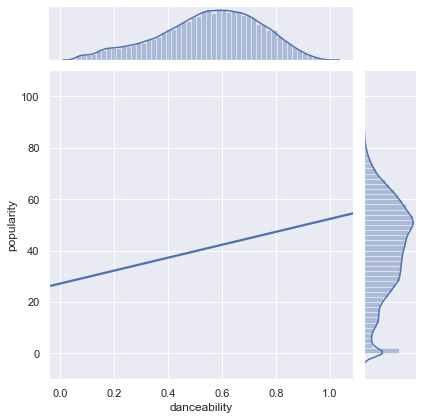

In [116]:
import seaborn as sns
sns.set(style="darkgrid")

sns.jointplot("danceability", "popularity", data=data, kind="reg", scatter = False)

* **Danceability** and **Popularity** are positively correlated. That is, if danceability increases, popularity increases and if danceability decreases, popularity decreases
* The scatter plot was mentioned False because, the plot becomes completely clumsy. The kind of the plot is 'reg' because we want to know how both danceability and popularity are related to each other

**Duration_ms**

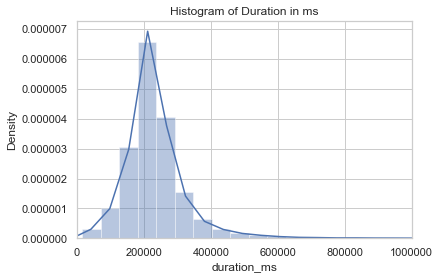

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['duration_ms'], bins = 100)
plt.title('Histogram of Duration in ms')
plt.xlim(0,1000000)
plt.ylabel('Density')
plt.show()

* Duration in milliseconds is right skewed distribution.
* Most of the tracks have 200000 ms of duration. That's 3.5 minutes - 4 minutes

Let's check out the boxplot of duration in ms

Text(0.5, 1.0, 'Boxplot of Duration in milliseconds')

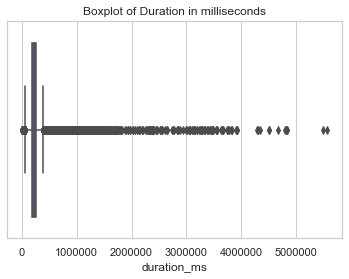

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['duration_ms'])
plt.title('Boxplot of Duration in milliseconds')

* As proved earlier, the data is a complete right skewed distribution and there are so many outliers to the right side of distribution.

**Energy**

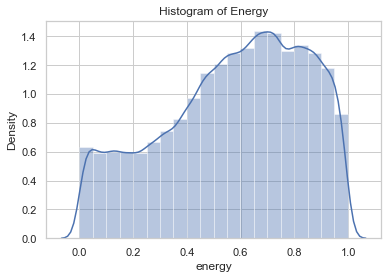

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['energy'], bins = 20)
plt.title('Histogram of Energy')
plt.ylabel('Density')
plt.show()

* Energy is a continuous variable which ranges from 0-1
* The distribution looks like above. Maximum number of values ranging from 0.6-0.8
* It is a left skewed distribution
* Let's look at the boxplot of Energy

Text(0.5, 1.0, 'Boxplot of Energy')

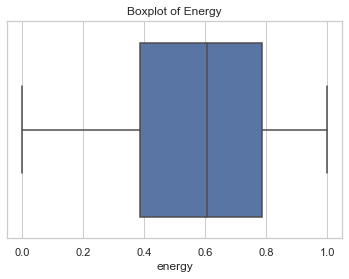

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['energy'])
plt.title('Boxplot of Energy')

* The mean of 'energy' is 0.6
* The first and third quartiles of the energy data are 0.4 and 0.8 respectively. 
* By this, we can say that we have more energetic songs in the data. (As mentioned above, higher the energy value, higher the energy of the song)

**Instrumentalness**

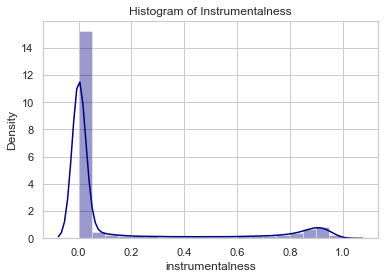

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['instrumentalness'], bins = 20, color = 'navy')
plt.title('Histogram of Instrumentalness')
plt.ylabel('Density')
plt.show()

* Completely right skewed data as we see that most of the values lie in the first bar. 
* Instrumentalness can be defined as: closer the value tends to 1, the more number of vocals are present in the track. So here, as so many of the values are closer to 0 than 1, we can say that major part of the songs are not with vocals but only music.
<br>
<br>
* The box plot of instrumentalness also looks in a similar manner as a complete right skewed distribution

**Key**

* There are multiple categories for 'key' column. They represent the group of pitches

In [140]:
key = data.groupby(['key'], as_index=False).count()
key = key.sort_values(by = ['track_id'], ascending = False)
key = key.iloc[:,0:2]

In [142]:
keys = key['key'].values.tolist()
keygenre = key['genre'].values.tolist()

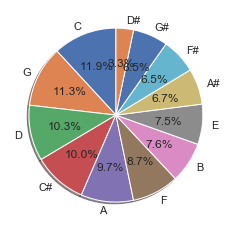

In [145]:
import seaborn as sns
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.pie(keygenre, labels=keys, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

* The highest percentage of category is 'key' C and 'key' G which are 11.9% and 11.3% respectively 
* The lowest percentage of category is 'key' D# and 'key' G# which are 3.3% and 6.5% respectively

**Liveness**

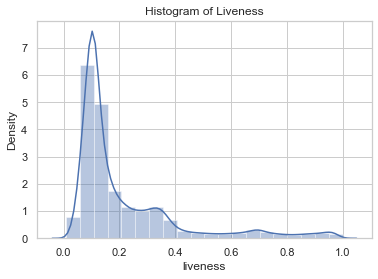

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['liveness'], bins = 20)
plt.title('Histogram of Liveness')
plt.ylabel('Density')
plt.show()

* Right skewed distribution
* As per the definition, if the value is more than 0.8, then it was said to be recorded live.
* Seems like there aren't much live recorded music tracks in the database
<br>
<br>
* Let's look at the boxplot of Liveness

Text(0.5, 1.0, 'Boxplot of Liveness')

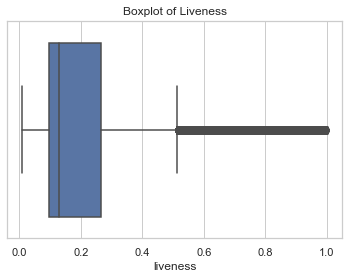

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['liveness'])
plt.title('Boxplot of Liveness')

* The boxplot shows that the mean of liveness is in between 0.1 and 0.2
* It also tells that any value greater than 0.5 is an outlier. 
* This means that there a very few data points which are recorded live and they are outliers.

**Loudness**

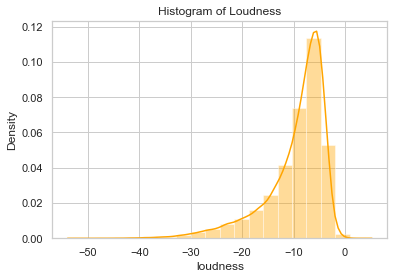

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['loudness'], bins = 20, color = 'orange')
plt.title('Histogram of Loudness')
plt.ylabel('Density')
plt.show()

* Left skewed distribution
* Higher the value (more the value tends to 0, higher the loudness of the song)
* Most of the values lie from -10 to 0 which says that most of the songs are loud in nature

* Let's compare the relationship between ***loudness*** and ***popularity*** by using jointplot 

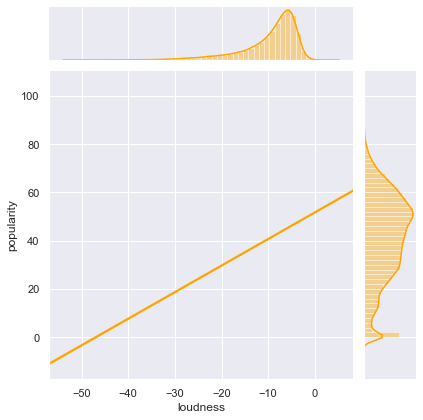

In [150]:
import seaborn as sns
sns.set(style="darkgrid")

sns.jointplot("loudness", "popularity", data=data, kind="reg", scatter = False, color = 'orange')

* The loudness and popularity are more correlated than danceability and popularity
* That is, loudness impacts popularity more than danceability impacting popularity
<br>
The above conclusion is made from a fact that, the slope of the above graph is more steeper than the jointplot of danceability and popularity

**Mode**

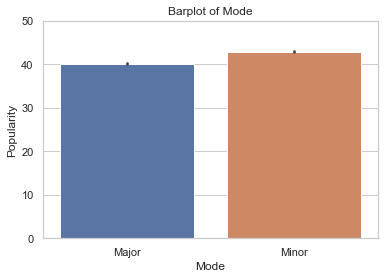

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.barplot(x=data['mode'], y=data['popularity'])
plt.title('Barplot of Mode')
plt.ylabel('Popularity')
plt.xlabel('Mode')
plt.ylim(0,50)
plt.show()

* There are two modes: Major and Minor Modes.
* We observe that the popularity for Minor mode is a little higher than Major mode

**Speechiness**

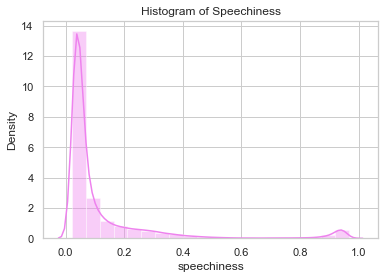

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['speechiness'], bins = 20, color = 'violet')
plt.title('Histogram of Speechiness')
plt.ylabel('Density')
plt.show()

* Right skewed Distribution
* As the definition says, if the speechiness is less than 0.33, then the track doesn't have any vocals. In the data, we have more tracks which don't have any vocals
* We see some outliers at 0.9 speechiness which are probably rap songs

* Let's look at the relationship between **speechiness** and **popularity** by plotting a jointplot

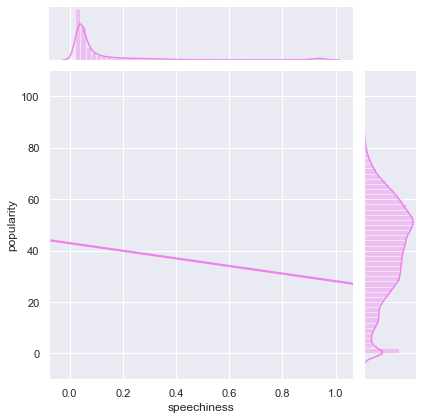

In [168]:
import seaborn as sns
sns.set(style="darkgrid")

sns.jointplot("speechiness", "popularity", data=data, kind="reg", scatter = False, color = 'violet')

* Speechiness and Popularity are negatively correlated to each other as the regression has a negative slope
* That is, if one increases, the other decreases. Figuratively we can describe this as **"If the vocals in the track are increasing, the popularity of the track is decreasing"**

**Tempo**

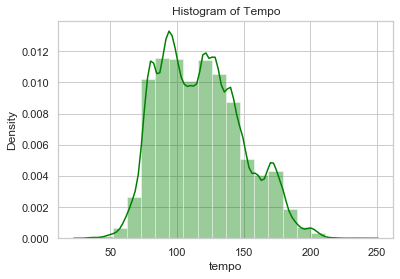

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['tempo'], bins = 20, color = 'green')
plt.title('Histogram of Tempo')
plt.ylabel('Density')
plt.show()

* Tempo is defined as the speed at which the passage of the music is playing
* It is a continuous variable which ranges from 30 to 243
* It is almost a bimodal distribution with values from 70-100 and 12-140 as modes

* Let's look at the boxplot of tempo

Text(0.5, 1.0, 'Boxplot of Tempo')

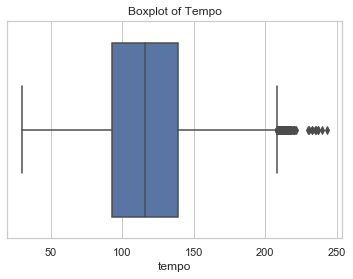

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data['tempo'])
plt.title('Boxplot of Tempo')

* The mean of Tempo lies between 110 - 120
* There are outliers to the right of the distribution. 
* All the values after 205 are outliers 

**Valence**

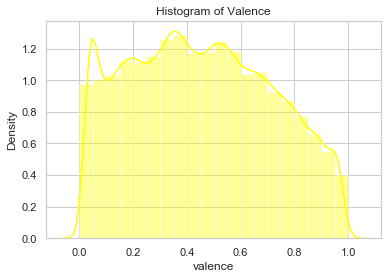

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(data['valence'], bins = 20, color = 'yellow')
plt.title('Histogram of Valence')
plt.ylabel('Density')
plt.show()

* Valence is a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
* We see that we have more happy, cheerful and euphoric tracks than the sad, depressed and angry tracks

* Let's look at the relationship between **Valence** and **Popularity**

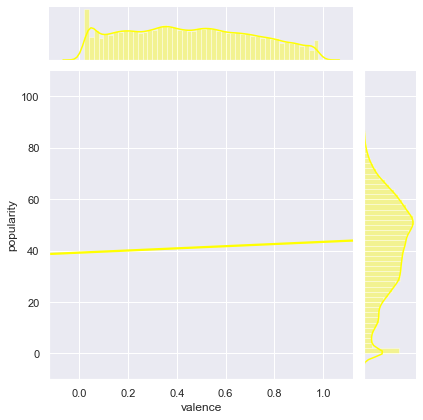

In [173]:
import seaborn as sns
sns.set(style="darkgrid")

sns.jointplot("valence", "popularity", data=data, kind="reg", scatter = False, color = 'yellow')

* Valence and Popularity are somewhat positively correlated.
* We can make an assumption that happy, joyful songs are more popular than sad and depressed songs

# Machine Learning Models

### Classification models for two labels - "popularity" and "genre"
#### Predicting the "popularity" and "genre" using two different models - 'Decision Tree Classifier' and 'Random Forest Classifier' and compare the accuracies of the models

## Decision Tree Classifier for Popularity 

Setting the target variable and other data

In [213]:
y = data['popularity']
X = data[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

**Splitting the data into train and test** 
<br>
Taking the 70-30 split (70% train and 30% test) for all the models

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Training the Decision Tree Classifier**

In [215]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_pop = DecisionTreeClassifier(random_state=42)
decision_tree_pop = decision_tree_pop.fit(X_train, y_train)

**Predicting on Test Data**

In [216]:
Y_predict = decision_tree_pop.predict(X_test)

**Getting the Accuracy Score**

In [217]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_predict)

0.23870635079778854

**The acuuracy of the Decision Tree Classifier for popularity is 23.87% which is low**

**As mentioned earlier, there might be missing values for "popularity"
<br>
Let's impute the missing values of "popularity" (0 values) using sklearn simpleimpute 'mean' technique**

In [238]:
missing_data = data[['popularity', 'tempo']]

In [239]:
from sklearn.impute import SimpleImputer
imp_pop = SimpleImputer(missing_values=0, strategy='mean')
imp_pop.fit(missing_data)
SimpleImputer()
missing_data = imp_pop.transform(missing_data)

In [249]:
import pandas as pd
missing_data = pd.DataFrame(missing_data)
missing_pop = missing_data.iloc[:,0]
missing_pop = missing_pop.round(0)

Now, let's look at the distribution of "popularity

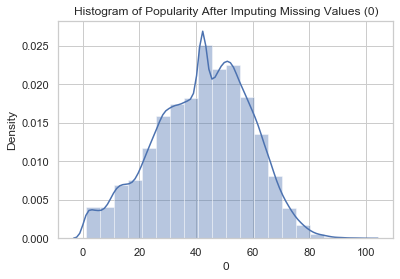

In [251]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style ="whitegrid") 
sns.distplot(missing_data.iloc[:,0], bins = 20)
plt.title('Histogram of Popularity After Imputing Missing Values (0)')
plt.ylabel('Density')
plt.show()

We can see that all the 0 values are imputed to 42 which is the mean of the popularity and there is a spike near 40. Now let's checkout the model with imputed missing values using mean

**Decision Tree Classifier Model After Imputing Missing values**

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
y = missing_pop
X = data[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
decision_tree_pop = DecisionTreeClassifier(random_state=0)
decision_tree_pop = decision_tree_pop.fit(X_train, y_train)
y_predict = decision_tree_pop.predict(X_test)
accuracy_score(y_test, y_predict)

0.2409550545704546

**The accuracy of the decision tree classifier model after imputing missing values is 24.09%
<br>
There is just 0.31% increase in accuracy of the model
<br>
Hence, the missing value treatment using "mean" technique didn't help that much but it helped to a very low extent**

Now let's dig into the Random Forest Model if that can increase accuracy of predicting the popularity of the track

## Random Forest Classifier for Popularity

Setting the target variable and other data

In [253]:
y = data['popularity']
X = data[['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]

**Splitting the data into train and test**

In [254]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Training the Random Forest Classifier**

In [255]:
from sklearn.ensemble import RandomForestClassifier
random_forest_pop = RandomForestClassifier(random_state=42)
random_forest_pop = random_forest_pop.fit(X_train, y_train)

*Random Forest Classifier takes a little more time to train the model!*

**Predicting on Test Data**

In [256]:
y_predict = random_forest_pop.predict(X_test)

**Getting the accuracy score**

In [257]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.2657910567475436

**The accuracy of prediciting popularity from a Random Forest Classifier is 26.57% which 3% more than a Decision Tree Classifier but this score is also not good!**  

Now let's predict the genre using both Decision tree classifier and Random Forest classifier

## Decision Tree Classifier for 'Genre'

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
y = data['genre']
X = data[['popularity','acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
decision_tree_pop = DecisionTreeClassifier(random_state=0)
decision_tree_pop = decision_tree_pop.fit(X_train, y_train)
y_predict = decision_tree_pop.predict(X_test)
accuracy_score(y_test, y_predict)

0.2791973416597439

**The accuracy of predicting the genre from a decision tree classifier is 27.9%**

Let's compare the prediction with Random Forest classifier

## Random Forest Classifier for 'Genre'

In [258]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y = data['genre']
X = data[['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
          'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
random_forest_pop = RandomForestClassifier(random_state=42)
random_forest_pop = random_forest_pop.fit(X_train, y_train)
y_predict = random_forest_pop.predict(X_test)
accuracy_score(y_test, y_predict)

0.3727262310578934

**The accuracy of predicting the genre from a Random Forest Classifier is 37.27% which is 10% better than the Decision Tree Classifier**  

# Conclusion and Next Steps

By this we can conclude that **Random Forest Classifier is better in classifying labels than Decision Tree Classifier for our dataset**
<br>
<br>
Overall, by this capstone project, I have learnt to 
* Deal with a relatively large dataset (233K rows and 18 columns) 
* Perform exploratory data analysis, visualize and interpret the data
* Draw conclusions from the data how each feature is related to the labels and how they are related to each other
* Identify and impute missing values using one of the imputing techniques from sklearn
* Deal with ML models: Decision Tree Classifier and Random Forest Classifier (Training and Testing and comparing the model accuracies)
<br>

**Next Steps**
<br>

There is a scope for improving the accuracy of the models by preparing the dataset in a certain way
* Identifying and Removing any columns(features) from the model which are overfitting the model can improve the accuracy score
* Converting the categorical variables like "key" and "mode" to continuous variables and add it to the model to improve the accuracy (or finding a way to add those variables to the model)
* Play around with max_depth of the models to obtain a good accuracy score
* Experimenting with other classifier models (Support Vector Machines, Nearest Neighbors) to see if these models can fit better with the data to improve the accuracy score
* Tuning the hyperparameters to get the best accuracy score